<a href="https://colab.research.google.com/github/Guiils/analise_de_dados/blob/main/airbnb_ad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gcsfs

In [ ]:
import pandas as pd
import os
from google.cloud import storage
import numpy as np

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
serviceAccount = '/content/advance-airline-377819-1bf613aac07c.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
client = storage.Client()
bucket = client.get_bucket('ad1-bucket')
bucket.blob('amsterdam_weekdays.csv')
path = 'gs://ad1-bucket/brutos/amsterdam_weekdays.csv'

In [ ]:
df = pd.read_csv(path)
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
dfback = df.copy()

In [ ]:
sorted(pd.unique(df['room_type']))

['Entire home/apt', 'Private room', 'Shared room']

In [ ]:
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [ ]:
df.loc[df.room_type == 'Private room', ['room_type']] = 'quarto privado'
df.loc[df.room_type == 'Entire home/apt', ['room_type']] = 'casa/apt inteiro'
df.loc[df.room_type == 'Shared room', ['room_type']] = 'quarto compartilhado'
df

In [ ]:
df.rename(columns={'room_type':'tipo', 'room_shared':'compartilhado','room_private':'privado','person_capacity':'p_capacidade','host_is_superhost':'superhost','cleanliness_rating':'nota_limpeza','guest_satisfaction_overall':'media_satisfacao','bedrooms':'quartos'}, inplace=True)

In [ ]:
dfback2 = df.copy()

In [ ]:
fttiprivado = df.tipo == 'quarto privado'
ftticomp = df.tipo == 'quarto compartilhado'
ftticasapt = df.tipo == 'casa/apt inteiro'
ftcapacidade2 = df.p_capacidade == 2.0
ftcapacidade3 = df.p_capacidade == 3.0
ftcapacidade4 = df.p_capacidade == 4.0
ftcapacidade5 = df.p_capacidade == 5.0
ftcapacidade6 = df.p_capacidade == 6.0
filtrotipos = df.tipo.isin(['quarto privado','quarto compartilhado','casa/apt inteiro'])
filtrostaisfacao = df.media_satisfacao == 100.0


In [ ]:
dfsatisfacao = df.loc[filtrotipos & filtrostaisfacao]

<AxesSubplot:xlabel='tipo', ylabel='Quartos com nota máxima'>

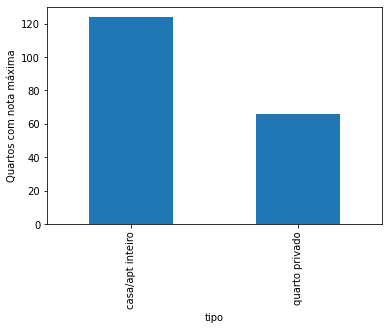

In [ ]:
dfsatisfacao.groupby(['tipo']).size().sort_values(ascending=False).plot.bar(ylabel='Quartos com nota máxima')

In [ ]:
df.head(2)

,realSum,tipo,compartilhado,privado,p_capacidade,superhost,multi,biz,nota_limpeza,media_satisfacao,quartos,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,quarto privado,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,quarto privado,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432


In [ ]:
filtrolimpezabom = df.nota_limpeza >= 7.0
filtrolimpezam = (df.nota_limpeza < 7.0) & (df.nota_limpeza >=5)
filtrolimpezar = (df.nota_limpeza < 5.0)



In [ ]:
dflimpezabom = df.loc[filtrotipos & filtrolimpezabom]
dflimpezam = df.loc[filtrotipos & filtrolimpezam]
dflimpezar = df.loc[filtrotipos & filtrolimpezar]

<AxesSubplot:xlabel='tipo'>

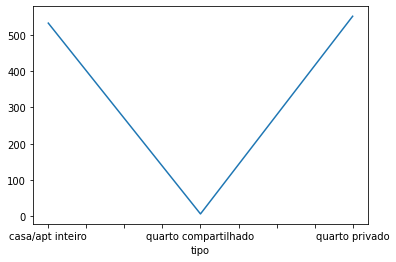

In [ ]:
dflimpezabom.groupby(['tipo']).size().plot.line()

<AxesSubplot:xlabel='tipo'>

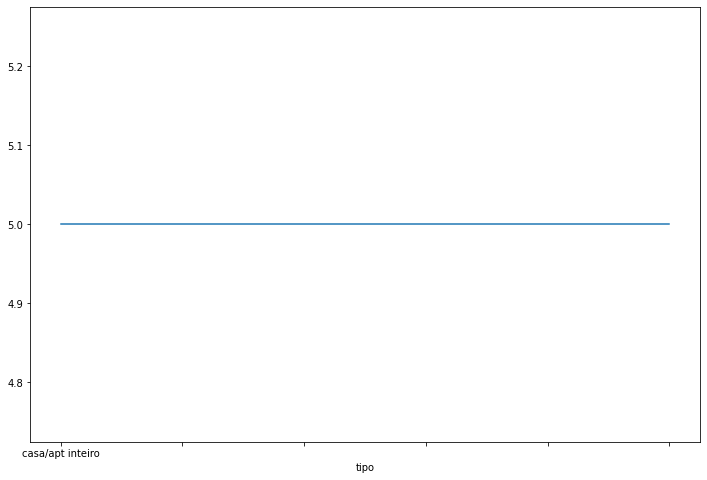

In [ ]:
dflimpezam.groupby(['tipo']).size().plot.line(figsize=(12,8))

<AxesSubplot:xlabel='tipo'>

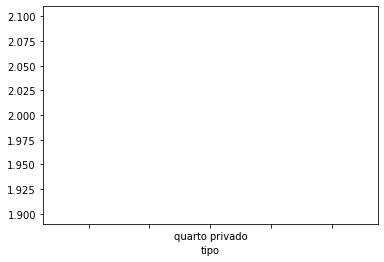

In [ ]:
dflimpezar.groupby(['tipo']).size().plot.line()